In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.shape

(13320, 9)

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
import seaborn as sns

In [9]:
data.duplicated().sum()

529

In [10]:
data=data.drop_duplicates()

In [11]:
data.shape

(12791, 9)

<Axes: >

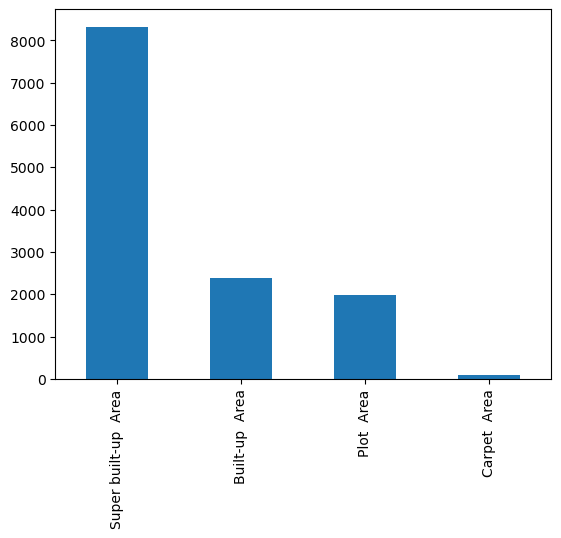

In [12]:
data["area_type"].value_counts().plot(kind="bar")

In [13]:
data.corr(numeric_only=True)

,bath,balcony,price
bath,1.000000,0.200387,0.453099
balcony,0.200387,1.000000,0.118645
price,0.453099,0.118645,1.000000


In [14]:
data.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007818
size             0.125088
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

In [15]:
data=data.drop(columns=["society"])

In [16]:
data.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
data["size"].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [18]:
x=data.drop(columns=["price"])
y=data["price"]

<Axes: >

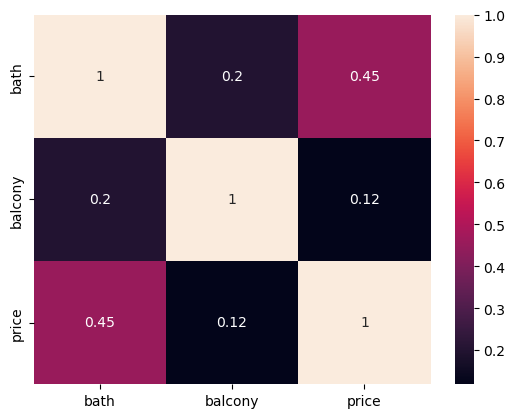

In [19]:
numer=["bath","balcony","price"]
corr=data[numer].corr()
sns.heatmap(corr,annot=True)

In [20]:
def change(val):
    if val==np.nan:
        return np.nan
    else:
        d=str(val).split(" ")
        return float(d[0])
    
data["size"]=data["size"].apply(change)
data["size"]=data["size"].fillna(data["size"].mean())
    

In [21]:
data["size"].isnull().sum()

0

In [22]:
data.isnull().sum()

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [23]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


In [24]:
data["availability"].value_counts()

Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [25]:
def avail(val):
    if val=="Ready To Move":
        return 1
    else:
        return 0
    
data["availability"]=data["availability"].apply(avail)

In [26]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2.0,1200,2.0,1.0,51.00


In [27]:
data["total_sqft"].value_counts()

1200           808
1100           210
1500           202
2400           196
600            178
              ... 
2563 - 2733      1
2005             1
605 - 624        1
4260 - 4408      1
4689             1
Name: total_sqft, Length: 2117, dtype: int64

In [28]:
def trans(val):
    if "-" in val:
        val=val.split("-")
        return (float(val[0])+float(val[1]))/2
    else:
        try:
            return float(val)
        except:
            return np.nan
    
data["total_sqft"]=data["total_sqft"].apply(trans)

In [29]:
data["total_sqft"].isnull().sum()

46

In [30]:
data["total_sqft"]=data["total_sqft"].fillna(data["size"].mean())

In [31]:
data.isnull().sum()

area_type         0
availability      0
location          1
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

In [32]:
data["bath"]=data["bath"].fillna(data["bath"].mean())

In [33]:
data["balcony"]=data["balcony"].fillna(data["balcony"].mean())

In [34]:
data["location"]=data["location"].fillna("Whitefield")

In [35]:
data["location"].value_counts()

Whitefield                        524
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [36]:
data["location"]=data["location"].apply(lambda x:x.strip())
locations=data["location"].value_counts()

In [37]:
locations

Whitefield                        525
Sarjapur  Road                    379
Electronic City                   289
Kanakpura Road                    249
Thanisandra                       232
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [38]:
type(locations)

pandas.core.series.Series

In [39]:
locations=locations[locations<10]

In [40]:
locations

Kaverappa Layout                  9
Vishwanatha Nagenahalli           9
Basapura                          9
2nd Phase JP Nagar                9
Medahalli                         9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 1044, dtype: int64

In [41]:
def conv(x):
    if x in locations:
        return "Other"
    else:
        return x
    
data["location"]=data["location"].apply(conv)

In [42]:
data["location"].value_counts()

Other                   2763
Whitefield               525
Sarjapur  Road           379
Electronic City          289
Kanakpura Road           249
                        ... 
Nagappa Reddy Layout      10
BTM 1st Stage             10
Sector 1 HSR Layout       10
Pattandur Agrahara        10
Nagadevanahalli           10
Name: location, Length: 251, dtype: int64

In [43]:
data.describe()

,availability,size,total_sqft,bath,balcony,price
count,12791.000000,12791.000000,12791.000000,12791.000000,12791.000000,12791.000000
mean,0.795247,2.817847,1563.969082,2.708602,1.582308,114.317646
std,0.403537,1.311021,1261.060187,1.353884,0.802846,151.480310
min,0.000000,1.000000,1.000000,1.000000,0.000000,8.000000
25%,1.000000,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,1.000000,3.000000,1280.000000,2.000000,2.000000,73.000000
75%,1.000000,3.000000,1690.000000,3.000000,2.000000,121.000000
max,1.000000,43.000000,52272.000000,40.000000,3.000000,3600.000000


In [44]:
data["bhk"]=data["size"]

In [45]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,1,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,1,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,1,Kothanur,2.0,1200.0,2.0,1.0,51.00,2.0


In [46]:
data=data.drop(columns=["size"])

In [47]:
data.describe()

,availability,total_sqft,bath,balcony,price,bhk
count,12791.000000,12791.000000,12791.000000,12791.000000,12791.000000,12791.000000
mean,0.795247,1563.969082,2.708602,1.582308,114.317646,2.817847
std,0.403537,1261.060187,1.353884,0.802846,151.480310,1.311021
min,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1.000000,1280.000000,2.000000,2.000000,73.000000,3.000000
75%,1.000000,1690.000000,3.000000,2.000000,121.000000,3.000000
max,1.000000,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [48]:
data["price_sqft"]=data["price"]*100000/data["total_sqft"]

In [49]:
data=data[(data["total_sqft"]/data["bhk"])>=300]

In [50]:
data.describe()

,availability,total_sqft,bath,balcony,price,bhk,price_sqft
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,0.785197,1606.223870,2.575949,1.586058,113.252382,2.661734,6363.396694
std,0.410703,1283.874933,1.089210,0.796812,154.815223,0.987776,4226.681217
min,0.000000,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1.000000,1117.000000,2.000000,1.000000,49.975000,2.000000,4250.000000
50%,1.000000,1306.000000,2.000000,2.000000,70.000000,3.000000,5330.490405
75%,1.000000,1715.000000,3.000000,2.000000,120.000000,3.000000,6967.569041
max,1.000000,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


<Axes: >

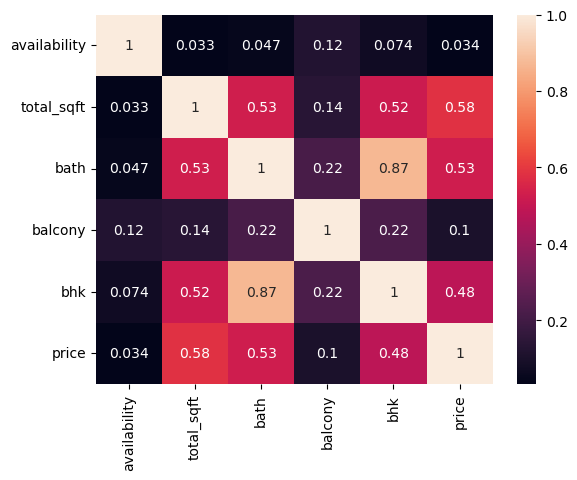

In [51]:
nums=["availability","total_sqft","bath","balcony","bhk","price"]
sns.heatmap(data[nums].corr(),annot=True)

In [52]:
#Dropping Availabilty as it has very little correlation with price
data=data.drop(columns=["availability"])

In [53]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000


<Axes: ylabel='price_sqft'>

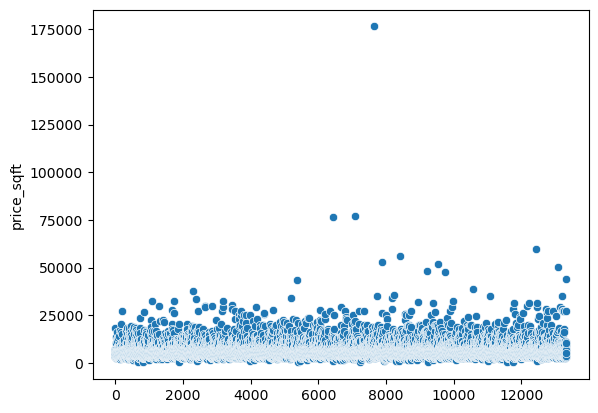

In [54]:
sns.scatterplot(data["price_sqft"])

<Axes: >

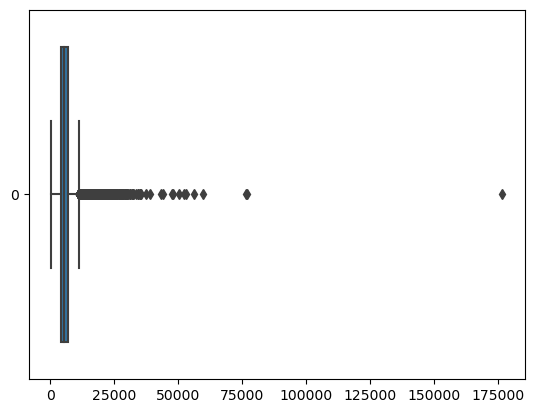

In [55]:
sns.boxplot(data["price_sqft"],orient="h")

In [56]:
left=data["price_sqft"].quantile(0.25)
right=data["price_sqft"].quantile(0.75)
iqr=right-left
iqr

2717.5690406976737

In [57]:
left_lim=left-1.5*iqr
right_lim=right+1.5*iqr

In [58]:
left_lim,right_lim

(173.64643895348945, 11043.922601744183)

In [59]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_sqft
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,1606.223870,2.575949,1.586058,113.252382,2.661734,6363.396694
std,1283.874933,1.089210,0.796812,154.815223,0.987776,4226.681217
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1117.000000,2.000000,1.000000,49.975000,2.000000,4250.000000
50%,1306.000000,2.000000,2.000000,70.000000,3.000000,5330.490405
75%,1715.000000,3.000000,2.000000,120.000000,3.000000,6967.569041
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [60]:
data[data["price_sqft"]<right_lim].describe()

,total_sqft,bath,balcony,price,bhk,price_sqft
count,11032.000000,11032.000000,11032.000000,11032.000000,11032.000000,11032.000000
mean,1535.155959,2.482107,1.581528,86.949724,2.583690,5449.507001
std,1227.517115,0.996686,0.789051,71.616503,0.920387,1785.430186
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,48.000000,2.000000,4166.666667
50%,1286.500000,2.000000,2.000000,66.865000,2.000000,5144.995323
75%,1650.000000,3.000000,2.000000,100.000000,3.000000,6465.713523
max,52272.000000,16.000000,3.000000,2100.000000,16.000000,11041.207927


In [61]:
data[data["price_sqft"]>left_lim].describe()

,total_sqft,bath,balcony,price,bhk,price_sqft
count,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000,12011.000000
mean,1606.223870,2.575949,1.586058,113.252382,2.661734,6363.396694
std,1283.874933,1.089210,0.796812,154.815223,0.987776,4226.681217
min,300.000000,1.000000,0.000000,8.440000,1.000000,267.829813
25%,1117.000000,2.000000,1.000000,49.975000,2.000000,4250.000000
50%,1306.000000,2.000000,2.000000,70.000000,3.000000,5330.490405
75%,1715.000000,3.000000,2.000000,120.000000,3.000000,6967.569041
max,52272.000000,16.000000,3.000000,3600.000000,16.000000,176470.588235


In [62]:
def remove_outlier_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_sqft)

        st = np.std(subdf.price_sqft)

        gen_df = subdf[(subdf.price_sqft > (m-st)) & (subdf.price_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

data = remove_outlier_sqft(data)
data.describe()

,total_sqft,bath,balcony,price,bhk,price_sqft
count,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000,9868.000000
mean,1521.389833,2.491455,1.590845,93.246588,2.585538,5719.014156
std,899.509647,1.001201,0.787403,89.997301,0.911290,2314.223769
min,300.000000,1.000000,0.000000,10.000000,1.000000,1250.000000
25%,1109.000000,2.000000,1.000000,49.857500,2.000000,4284.323272
50%,1299.500000,2.000000,2.000000,68.000000,2.000000,5211.440764
75%,1664.000000,3.000000,2.000000,101.000000,3.000000,6495.327103
max,30400.000000,16.000000,3.000000,2200.000000,16.000000,24509.803922


<Axes: xlabel='bhk', ylabel='Count'>

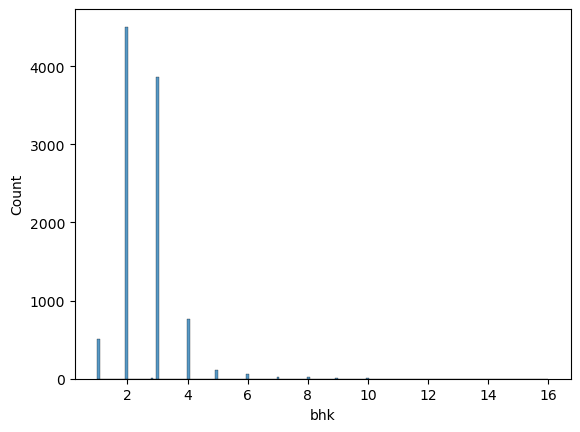

In [63]:
sns.histplot(data["bhk"])

In [64]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_sqft),
                'std' : np.std(bhk_df.price_sqft),
                'count' : bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data=bhk_outlier_remover(data)

In [65]:
data.shape

(7099, 8)

In [66]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0,11983.805668


In [67]:
data["area_type"].nunique()

4

In [68]:
data["area_type"].value_counts()

Super built-up  Area    5097
Built-up  Area          1342
Plot  Area               617
Carpet  Area              43
Name: area_type, dtype: int64

In [69]:
l=set(data["area_type"])
l

{'Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'}

In [70]:
d={}
v=0
for i in l:
    d[i]=v
    v+=1
d

{'Super built-up  Area': 0,
 'Plot  Area': 1,
 'Carpet  Area': 2,
 'Built-up  Area': 3}

In [71]:
def conv(val):
    return d[val]

data["area_type"]=data["area_type"].apply(conv)

In [72]:
data.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
price_sqft    0
dtype: int64

<Axes: >

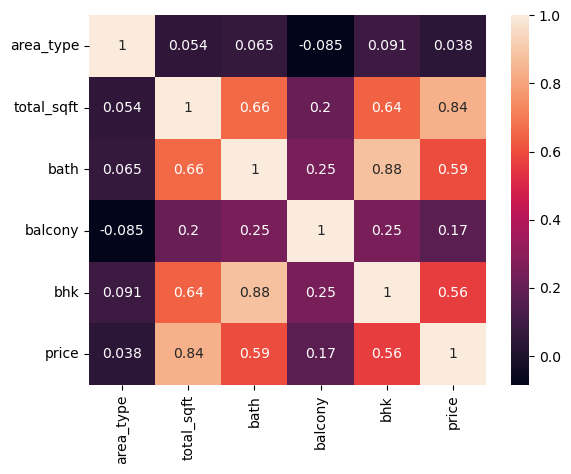

In [73]:
nums=["area_type","total_sqft","bath","balcony","bhk","price"]
sns.heatmap(data[nums].corr(),annot=True)

In [74]:
data=data.drop(columns=["price_sqft"])

In [80]:
#Removing Area Type due to low Correlation to price
data=data.drop(columns=["area_type"])

In [103]:
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2.0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [104]:
x=data.drop(columns=["price"])
y=data["price"]

In [105]:
x.head()

,location,total_sqft,bath,balcony,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,4.0
1,1st Block Jayanagar,1630.0,3.0,2.0,3.0
2,1st Block Jayanagar,1875.0,2.0,3.0,3.0
3,1st Block Jayanagar,1200.0,2.0,0.0,3.0
4,1st Block Jayanagar,1235.0,2.0,2.0,2.0


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [107]:
columns=make_column_transformer((OneHotEncoder(sparse=False),["location"]),remainder="passthrough")

In [108]:
scaler=StandardScaler()

In [109]:
lr=LinearRegression()

In [110]:
pipe=make_pipeline(columns,scaler,lr)

In [111]:
pipe.fit(x_train,y_train)

C:\Users\EXECUTIVE ENGINEER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [112]:
y_pred=pipe.predict(x_test)

In [113]:
y_pred

array([ 47.09287101,  71.65927726,   6.93271476, ...,  43.55966789,
       104.65341789, 102.06357414])

In [114]:
r2_score(y_test,y_pred)

0.8324968808171452

In [115]:
lasso=Lasso()
pipe=make_pipeline(columns,scaler,lasso)
pipe.fit(x_train,y_train)

C:\Users\EXECUTIVE ENGINEER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [116]:
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8336600176429247

In [93]:
ridge=Ridge()
pipe=make_pipeline(columns,scaler,ridge)
pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

C:\Users\EXECUTIVE ENGINEER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8327778385534497

In [117]:
data

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4.0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3.0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3.0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3.0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2.0
...,...,...,...,...,...,...
9855,Yeshwanthpur,672.0,1.0,1.0,36.85,1.0
9858,Yeshwanthpur,1692.0,3.0,3.0,108.00,3.0
9860,Yeshwanthpur,2500.0,5.0,2.0,185.00,6.0
9865,Yeshwanthpur,1855.0,3.0,3.0,135.00,3.0


In [118]:
data.to_csv("Processed.csv")

In [119]:
import pickle

In [120]:
pickle.dump(pipe,open("Model.pkl","wb"))